In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reading data

data_frame = pd.read_csv("Churn_Modelling.csv")
data_frame.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7062,7063,15706762,Ignatyev,597,France,Female,41,4,145809.53,2,1,1,52319.26,0
6454,6455,15705899,Craig,597,Spain,Male,35,0,127510.99,1,1,1,155356.34,0
3247,3248,15721835,Owen,791,Spain,Male,25,7,0.00,1,1,0,89666.28,0
7191,7192,15567839,Gordon,501,France,Male,42,9,114631.23,1,0,1,91429.74,0
2521,2522,15739068,Nwoye,638,Germany,Male,25,4,148045.45,2,1,1,114722.42,0


In [3]:
# Showing data info to know columns data_types and printing null values number in each column

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# By notic , 'CustomerId',"Surname" are not important , so we're gonna drop them

data_frame.drop(['CustomerId',"Surname","RowNumber"],axis='columns',inplace=True)

In [5]:
# Geography data type is object so we about to know its values to decide if it will be dropped or converted to numeric 

data_frame["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
# It has only 3 values , so we're gonna replace each value with a number

data_frame["Geography"] = data_frame["Geography"].replace({"France":1,"Germany":2,"Spain":3})

In [7]:
data_frame["Geography"]

0       1
1       3
2       1
3       1
4       3
       ..
9995    1
9996    1
9997    1
9998    2
9999    1
Name: Geography, Length: 10000, dtype: int64

In [8]:
# Gender data type is object so we about to know its values to decide if it will be dropped or converted to numeric 

data_frame["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
# It has only 2 values , so we're gonna replace each value with a number

data_frame["Gender"] = data_frame["Gender"].replace({"Male":1,"Female":2})

In [10]:
data_frame["Gender"] 

0       2
1       2
2       2
3       2
4       2
       ..
9995    1
9996    1
9997    2
9998    1
9999    2
Name: Gender, Length: 10000, dtype: int64

In [11]:
data_frame.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
data_frame2 = data_frame

In [13]:
# Scalling time , we should scall our data to get the best accuracy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# specifying what columns to be scalled
cols_to_scale = ['CreditScore','Age','Balance',"EstimatedSalary","Tenure","NumOfProducts"]

# Now we're gonna replace all the columns with the scalled ones
data_frame2[cols_to_scale] = scaler.fit_transform(data_frame2[cols_to_scale])

data_frame2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,2,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,3,2,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,2,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,2,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,3,2,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [14]:
# splitting data into freatures and targets

X = data_frame2.drop('Exited',axis='columns')
y = data_frame2['Exited']

In [15]:
# No We're gonna split data into train and test using the (freatures and targets) columns splitted in the last cell
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,3,2,0.283784,0.6,0.000000,0.333333,0,0,0.096273
4154,0.752,1,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478
3881,0.476,1,2,0.621622,0.3,0.000000,0.000000,1,1,0.948551
9238,0.846,1,2,0.432432,0.4,0.000000,0.333333,1,0,0.646869
5210,0.402,1,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670
...,...,...,...,...,...,...,...,...,...,...
3046,0.616,2,2,0.175676,0.3,0.530108,0.000000,0,1,0.731708
9917,0.570,2,1,0.472973,0.8,0.466347,0.000000,0,1,0.618234
4079,0.466,1,2,0.175676,0.4,0.633639,0.000000,1,0,0.062643
2254,0.658,1,1,0.243243,0.6,0.588819,0.000000,0,1,0.862531


In [16]:
X_train.shape

(8000, 10)

In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
250/250 [==============================] - 1s 1ms/step - loss: 0.5652 - accuracy: 0.7171
Epoch 2/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7960
Epoch 3/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7961
Epoch 4/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7976
Epoch 5/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8012
Epoch 6/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8052
Epoch 7/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8084
Epoch 8/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8131
Epoch 9/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8148
Epoch 10/80
250/250 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8149

In [18]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 997us/step - loss: 0.3649 - accuracy: 0.8515


[0.3649047315120697, 0.8514999747276306]

In [19]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 815us/step


In [20]:
yp[:5]

array([[0.03848443],
       [0.0928263 ],
       [0.10546787],
       [0.11689562],
       [0.10795468]], dtype=float32)

In [21]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(51.0, 0.5, 'Truth')

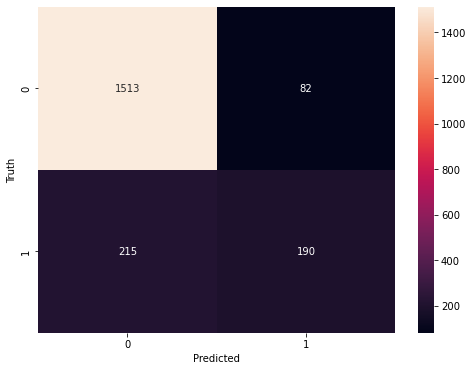

In [23]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

______  ___      
___   |/  /_____ 
__  /|_/ /_  __ \
_  /  / / / /_/ /
/_/  /_/  \____/ 
                 

